<a href="https://colab.research.google.com/github/Metalface-code/Mushrooms-/blob/main/Mushroom_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram in a Jupyter lab or notebook context
set_config(display='diagram') # {‘text’, ‘diagram’}, default=None

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/mushrooms.csv')
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [4]:
ml_df = df.copy()

In [5]:
ml_df.isna().sum()
# no missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
ml_df.duplicated().any()
# no duplicate rows

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
ml_df.shape

(8124, 23)

In [9]:
ml_df["class"] = ml_df["class"].replace("p", 1)
ml_df["class"] = ml_df["class"].replace("e", 0)

In [10]:
Target = 'class'
X = ml_df.drop(columns=Target)
y = ml_df[Target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
# we need to define a variable for each type of feature
cat_feat = make_column_selector(dtype_include = 'object')

# This will identify all of the quantitive features (columns)
qaunt_feat = make_column_selector(dtype_include = 'number')

# Instantiate the column transformers you want to use 
encoder = OneHotEncoder(sparse=False, handle_unknown= 'ignore')

# Scale the data to be ready for clustering (KNN)
scaler = StandardScaler()

# We will use a mean imputer to impute values missing for numeric columns
mean_imputer = SimpleImputer(strategy= 'mean')

# We will use a most frequent imputer to impute values for the categorical columns
freq_imputer = SimpleImputer(strategy= 'most_frequent')


In [13]:
cat_processor = make_pipeline(freq_imputer, encoder)

In [14]:
cat_tuple = (cat_processor, cat_feat)

In [15]:
column_transformer = make_column_transformer(cat_tuple, remainder = 'passthrough')

{0.0001: 0.5120630231413097,
 0.001: 0.5120630231413097,
 0.01: 0.9753815854258986,
 0.1: 0.9985228951255539,
 1: 1.0,
 10: 1.0,
 100: 1.0,
 1000: 1.0}

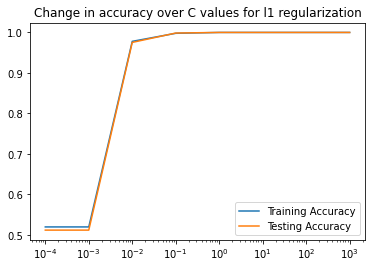

In [16]:
#L1 Tuning:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(column_transformer, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [17]:
rf_clf = RandomForestClassifier(random_state=42)
rf_pipline = make_pipeline(column_transformer, rf_clf)
rf_pipline.fit(X_train, y_train)




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b091bcd10>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [18]:
pipe_param_grid = {'randomforestclassifier__min_samples_leaf': range(1,10),
              'randomforestclassifier__random_state': range(1,5), 'randomforestclassifier__bootstrap': range(1,5)}

In [19]:
rf_pipline = GridSearchCV(rf_pipline, pipe_param_grid)

rf_pipline.fit(X_train, y_train)
print('Best RandomForest Parameters:')
print(rf_pipline.best_params_)
best_pipe = rf_pipline.best_estimator_
print(f'Accuracy of best RandomForest model is: {best_pipe.score(X_test, y_test)}')

Best RandomForest Parameters:
{'randomforestclassifier__bootstrap': 1, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__random_state': 1}
Accuracy of best RandomForest model is: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


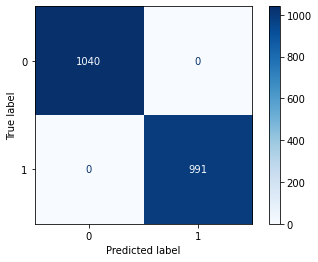

In [20]:
plot_confusion_matrix(rf_pipline, X_test, y_test, cmap = 'Blues', values_format = 'd')

In [21]:
knn_pipe = make_pipeline (column_transformer, KNeighborsClassifier())
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b091bcd10>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [22]:
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)
#predict KNN

In [23]:
# cross-validation will create an array of scores for each fold
scores = cross_val_score(knn_pipe, X_train, y_train, cv=5)

print(f'Accuracy scores for each fold are: {scores.round(2)}')
print(f'Average accuracy across folds is {np.mean(scores)}')

Accuracy scores for each fold are: [1. 1. 1. 1. 1.]
Average accuracy across folds is 1.0


In [24]:
# Hypertune using the cross validation
# Create a range of odd integer from 1 to 19 values for the k number of neighbors

ks = range(1,20, 2)
list(ks)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [25]:
# loop through values of K

scores = []

for k in ks:
  knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
  scores.append(cross_val_score(knn_pipe, X_train, y_train))

scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 34

[array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan])]

In [26]:
for index, k in enumerate(ks):
  mean_score = np.mean(scores[index])
  print(f'Score for n_neighbors = {k} is {mean_score}')

Score for n_neighbors = 1 is nan
Score for n_neighbors = 3 is nan
Score for n_neighbors = 5 is nan
Score for n_neighbors = 7 is nan
Score for n_neighbors = 9 is nan
Score for n_neighbors = 11 is nan
Score for n_neighbors = 13 is nan
Score for n_neighbors = 15 is nan
Score for n_neighbors = 17 is nan
Score for n_neighbors = 19 is nan


In [27]:
# final KNN model 
final_model = KNeighborsClassifier(n_neighbors=9)
final_pipe = make_pipeline(column_transformer,StandardScaler(), final_model)
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b091bcd10>)])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [28]:
# Evaluate the accuracy of the final pipeline model on the test set.
final_pipe.score(X_test, y_test)

1.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


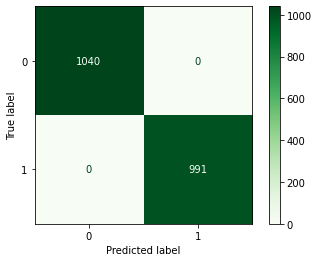

In [29]:
plot_confusion_matrix(final_pipe, X_test, y_test, cmap = 'Greens', values_format = 'd')
# hypertuned KNN model
# perfect ratio of true values. we know for sure which is poison and which is not. great model for accuracy

They both come out the same since the target is pretty simple its very easy to classify which are poisonous or edible either way by default. I would still go with the KNN model in this case due to simplicity and effenciency

Lets test the PCA on this model to see if we can make it more effecient

In [30]:
KNN = KNeighborsClassifier()

In [31]:
pca = PCA(n_components=.95)

In [32]:
KNN_pipe_pca = make_pipeline(column_transformer, pca, KNN)

In [33]:
KNN_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b091bcd10>)])),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [34]:
%%time
train_preds_pca = KNN_pipe_pca.predict(X_train)
test_preds_pca = KNN_pipe_pca.predict(X_test)

CPU times: user 1.73 s, sys: 257 ms, total: 1.99 s
Wall time: 1.56 s


In [35]:
print('Accuracy of Train set', accuracy_score(y_train, train_preds_pca))
print('Accuracy of Test set', accuracy_score(y_test, test_preds_pca))

Accuracy of Train set 1.0
Accuracy of Test set 1.0


In [36]:
KNN_pipe = make_pipeline(column_transformer, KNN)

In [37]:
KNN_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b091bcd10>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [38]:
%%time
train_preds = KNN_pipe.predict(X_train)
test_preds = KNN_pipe.predict(X_test)
# predict with no PCA

CPU times: user 2.19 s, sys: 221 ms, total: 2.41 s
Wall time: 1.88 s


In [39]:
print('Accuracy of Train set', accuracy_score(y_train, train_preds))
print('Accuracy of Test set', accuracy_score(y_test, test_preds))

Accuracy of Train set 1.0
Accuracy of Test set 1.0


The model I tested was very accurate in finding which mushrooms were safe and usful for medical trails with humans
Random Forrest and KNN were used and compared to see which was more accurate but also more effecient for cost effectiveness
The KNN model was the best when used with PCA since it made the model 40 % more effecient without sacrificing accuracy

This model of this data set would seem to be a good fit in production if you were looking to study types of mushrooms that are consumable for grocery stors and even medical purposes if you wanted to start with a safe ingredient for medicnes.